In [3]:
df = pd.read_csv('PL_XSELL.csv', index_col = 0)

In [5]:
meta = pd.read_excel('PL_XSell_Metadata.xlsx')

In [14]:
Y = df.TARGET
x = df.drop('TARGET', axis=1)

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

x_gender = pd.DataFrame(enc.fit_transform([[g] for g in x.GENDER]).A, columns=['F', 'M', 'O'], index=x.index)

x_occupation = pd.DataFrame(enc.fit_transform([[oc] for oc in x.OCCUPATION]).A, columns=set(x.OCCUPATION), index=x.index)

x_acc_type = pd.DataFrame(enc.fit_transform([[at] for at in x.ACC_TYPE]).A, columns=set(x.ACC_TYPE), index=x.index)

In [98]:
from datetime import datetime

now = datetime.now()

acc_days = x.ACC_OP_DATE.apply(lambda x : x.replace('-', '/')).apply(lambda x: (now - datetime.strptime(x, '%m/%d/%Y')).days)
x_acc_days = pd.DataFrame(acc_days)
x_acc_days.columns = ['ACC_DAYS']

In [179]:
# AGEがあるので、'AGE_BKT'はｄｒｏｐする
x_ = x.drop(columns=['GENDER', 'OCCUPATION', 'ACC_TYPE', 'AGE_BKT','ACC_OP_DATE'], axis=1)

new_x = pd.concat([x_, x_gender, x_occupation, x_acc_type, x_acc_days], axis=1)

In [184]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(new_x)

In [190]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(y=Y, X=X_std)

/Users/mac/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

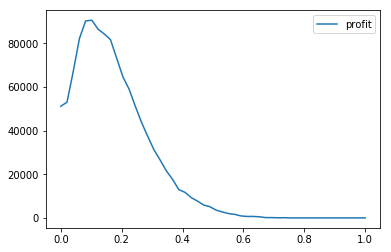

In [246]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(threshold, y_true, y_prob):
    y_pred = [pred[1] for pred in np.where(y_prob > threshold, 1, 0)]
    return confusion_matrix(y_pred=y_pred, y_true=y_true)

def calculate_profit(c_mat, gain, cost):
    sum_gain = gain * c_mat[1,1]
    sum_cost = cost * sum(c_mat[:,1])
    return sum_gain - sum_cost

y_prob = clf.predict_proba(X_std)
thresholds = np.linspace(0,1)
profits = []
gain = 100
cost = 10
for threshold in thresholds:
    c_mat = generate_confusion_matrix(threshold, y_true=Y, y_prob=y_prob)
    profit = calculate_profit(c_mat, gain, cost)
    profits.append(profit)

pd.DataFrame(profits, index=thresholds, columns=['profit']).plot()

In [247]:
res = pd.DataFrame(profits, index=thresholds, columns=['profit'])

In [249]:
res

,profit
0.000000,51200
0.020408,53070
0.040816,67110
0.061224,82280
0.081633,90340
0.102041,90660
0.122449,86570
0.142857,84380
0.163265,81760
0.183673,73220
